# Set Modules path

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../')) 
sys.path.append(module_path)

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from src.EDA import read_table_to_dataframe, missing_values_table,\
remove_rows_without_sessionid ,remove_rows_without_customerid, remove_last_location,\
fix_na_outlier, total_data, aggregate_column, total_data_app,  plot_count, plot_bar,\
decile_plot,plot_heatmap,plot_heatmap, plot_hist, plot_scatter
import warnings
warnings.filterwarnings('ignore')


# Load telecom data

In [3]:

connection_parameters = {
    'dbname': 'telecom',
    'user': 'postgres',
    'password': 'Tousside179316',
    'host': 'localhost',
    'port': '5432'
}

# Read a table into a pandas dataframe
telecom_data= read_table_to_dataframe('xdr_data', connection_parameters)





# Save non-cleaned data

In [4]:
telecom_data.to_csv("../data/telecom_data.csv")

# Data screening

In [5]:
telecom_data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [6]:
telecom_data.shape

(150001, 55)

# Dimension of data, types, columns name

In [7]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

## Missing values

In [8]:
telecom_data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

## piplene for Data cleaning

In [9]:

missing_values_table= FunctionTransformer(missing_values_table)
remove_rows_without_sessionid= FunctionTransformer(remove_rows_without_sessionid)
remove_rows_without_customerid= FunctionTransformer(remove_rows_without_customerid)
remove_last_location= FunctionTransformer(remove_last_location)
fix_na_outlier= FunctionTransformer(fix_na_outlier)




In [10]:
pipe = Pipeline([('missing_values_table', missing_values_table), 
                 ('remove_rows_without_sessionid', remove_rows_without_sessionid),
                 ('remove_rows_without_customerid', remove_rows_without_customerid),
                 ('remove_last_location', remove_last_location),
                 ('fix_na_outlier', fix_na_outlier)
                 ])

In [11]:
clean_data=pipe.fit_transform(telecom_data)

In [12]:
clean_data.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250

In [13]:
clean_data["MSISDN/Number"].value_counts()

MSISDN/Number
4.190654e+10    7426
3.362632e+10      18
3.362578e+10      17
3.361489e+10      17
3.365973e+10      16
                ... 
3.369533e+10       1
3.363022e+10       1
3.369819e+10       1
3.366268e+10       1
3.361962e+10       1
Name: count, Length: 101004, dtype: int64

# users’ behaviour on those applications.   


number of xDR sessions

Session duration

the total download (DL) and upload (UL) data

the total data volume (in Bytes) during this session for each application


In [14]:
clean_data= total_data(clean_data)

## save clean data

In [15]:
clean_data.to_csv("../data/clean_data.csv")

In [16]:
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Byte

## number of xDR sessions

In [17]:
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Byte

In [18]:
sessions_users=aggregate_column(clean_data, 'MSISDN/Number', "Bearer Id", "count")

In [19]:
aggregate_data_list=[sessions_users]
columns=['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)','Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)']
for column in columns:
    df_agg= aggregate_column(clean_data, 'MSISDN/Number', column, "sum")
    aggregate_data_list.append(df_agg.iloc[:,-1])

## concat them in one data frame

In [20]:
aggregate_data_user = pd.concat(aggregate_data_list, axis=1)

In [21]:
aggregate_data_user.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,1,116720.0,4.546640e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.000000,14900201.0,6724347.0,10265105.0,16915876.0,4.220642e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.000000,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.000000,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.000000,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,613139.486896,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0


## create a function to return total of DL and UL for each application

In [22]:
applicationDict={
    "Social_media_data":['Social Media DL (Bytes)', 'Social Media UL (Bytes)'], 

    "Google_data":['Google DL (Bytes)', 'Google UL (Bytes)'],

    "Email_data" :['Email DL (Bytes)', 'Email UL (Bytes)'],

    "Youtube_data":['Youtube DL (Bytes)','Youtube UL (Bytes)'],

    "Netflix_data": ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],

     "Gaming_data": ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
     
     "Others_data":['Other DL (Bytes)', 'Other UL (Bytes)']}

In [23]:
aggregate_data_user_total_app= total_data_app(aggregate_data_user,applicationDict)

In [24]:
aggregate_data_user_total_app

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data
0,3.360100e+10,1,1.167200e+05,4.546640e+08,3.605311e+07,2.232135e+06,4.389005e+06,1.331362e+06,2.162455e+07,2.718098e+07,4.234318e+08,3.865709e+08
1,3.360100e+10,1,1.812300e+05,1.207552e+08,3.610446e+07,2.660565e+06,5.334863e+06,3.307781e+06,1.243222e+07,1.122176e+07,1.197501e+08,2.817101e+08
2,3.360100e+10,1,1.349690e+05,5.566597e+08,3.930682e+07,3.195623e+06,3.443126e+06,3.205380e+06,2.133357e+07,1.935390e+07,5.388277e+08,5.016937e+08
3,3.360101e+10,1,4.987800e+04,4.019932e+08,2.032753e+07,2.802940e+05,9.678493e+06,2.284670e+06,6.977321e+06,1.942092e+06,3.911261e+08,3.527970e+07
4,3.360101e+10,2,3.710400e+04,1.363130e+09,9.428053e+07,2.912542e+06,1.849962e+07,2.860947e+06,4.153300e+07,4.920172e+07,1.314798e+09,8.048045e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
100999,3.376819e+10,2,1.358880e+05,4.069050e+08,6.307233e+07,3.336090e+06,5.517487e+06,1.096669e+06,5.245703e+07,5.426395e+07,3.553860e+08,5.407245e+08
101000,3.376819e+10,1,4.219200e+04,4.546640e+08,4.257133e+07,2.504400e+06,2.148869e+06,2.471068e+06,1.710442e+07,9.349252e+06,4.330584e+08,2.513046e+08
101001,3.376819e+10,1,2.605500e+04,3.194276e+08,3.219383e+07,2.054566e+06,5.668508e+06,2.914495e+06,2.157064e+07,3.267323e+07,2.770187e+08,5.394491e+08
101002,3.376819e+10,2,1.004660e+05,8.375787e+08,1.058004e+08,1.394059e+06,1.650865e+07,4.581572e+06,7.758388e+07,5.340379e+07,7.638505e+08,6.101909e+08


## Description relevant variables and associated data types

In [25]:
aggregate_data_user_total_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101004 entries, 0 to 101003
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MSISDN/Number      101004 non-null  float64
 1   Bearer Id          101004 non-null  int64  
 2   Dur. (ms)          101004 non-null  float64
 3   Total DL (Bytes)   101004 non-null  float64
 4   Total UL (Bytes)   101004 non-null  float64
 5   Social_media_data  101004 non-null  float64
 6   Google_data        101004 non-null  float64
 7   Email_data         101004 non-null  float64
 8   Youtube_data       101004 non-null  float64
 9   Netflix_data       101004 non-null  float64
 10  Gaming_data        101004 non-null  float64
 11  Others_data        101004 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.2 MB


# Non-Graphical Univariate Analysis

In [26]:
aggregate_data_user_total_app.iloc[:,1:].describe()

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data
count,101004.000000,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05,1.010040e+05
mean,1.470298,1.367778e+05,6.389510e+08,5.879374e+07,2.560521e+06,1.093739e+07,3.163571e+06,3.171146e+07,3.169049e+07,6.027363e+08,6.013140e+08
std,23.375761,2.151775e+06,1.009870e+10,9.329111e+08,4.031818e+07,1.751617e+08,5.025928e+07,5.039794e+08,5.044950e+08,9.535016e+09,9.675678e+09
min,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05
25%,1.000000,7.318925e+04,3.150878e+08,3.642643e+07,1.212268e+06,5.828333e+06,1.655080e+06,1.784888e+07,1.778326e+07,2.879912e+08,2.848256e+08
50%,1.000000,1.030170e+05,5.341091e+08,4.528153e+07,2.143580e+06,9.035286e+06,2.625835e+06,2.552235e+07,2.551373e+07,5.053160e+08,5.020193e+08
75%,2.000000,1.699465e+05,7.676801e+08,6.266099e+07,3.138590e+06,1.253405e+07,3.659342e+06,3.601230e+07,3.597933e+07,7.367527e+08,7.351822e+08
max,7426.000000,6.831992e+08,3.207028e+12,2.963436e+11,1.280310e+10,5.563217e+10,1.596188e+10,1.600712e+11,1.602353e+11,3.027896e+12,3.072639e+12


# Interpretation

All the variables are left skewed with a very high and different dispersion  as displayed by the std. THis point out the importance of mormalization and standardization for the machine learning models. 

## Graphical Univariate Analysis

###  top 10 handsets used by the customers


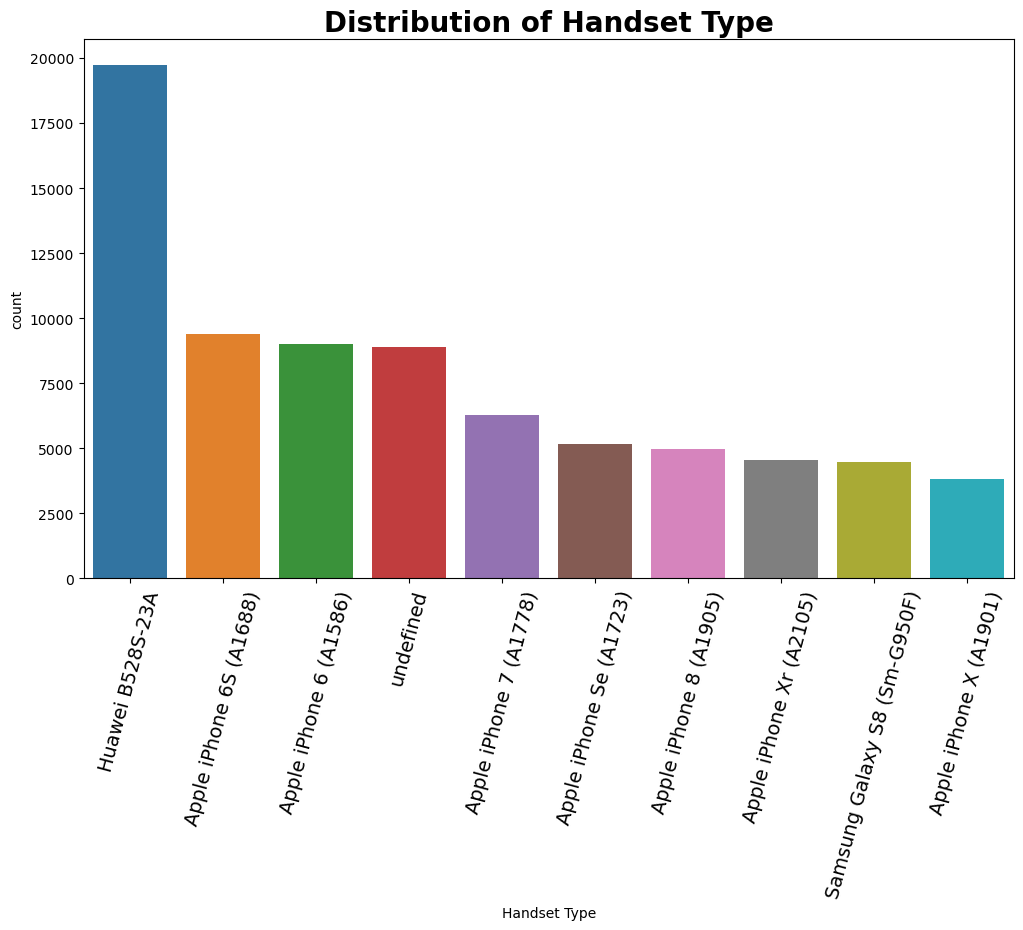

In [27]:
plot_count(clean_data, 'Handset Type', top=10)


# Interpretaion

Huawei and Apple are the most used  handset type 

### top 3 handset manufacturers


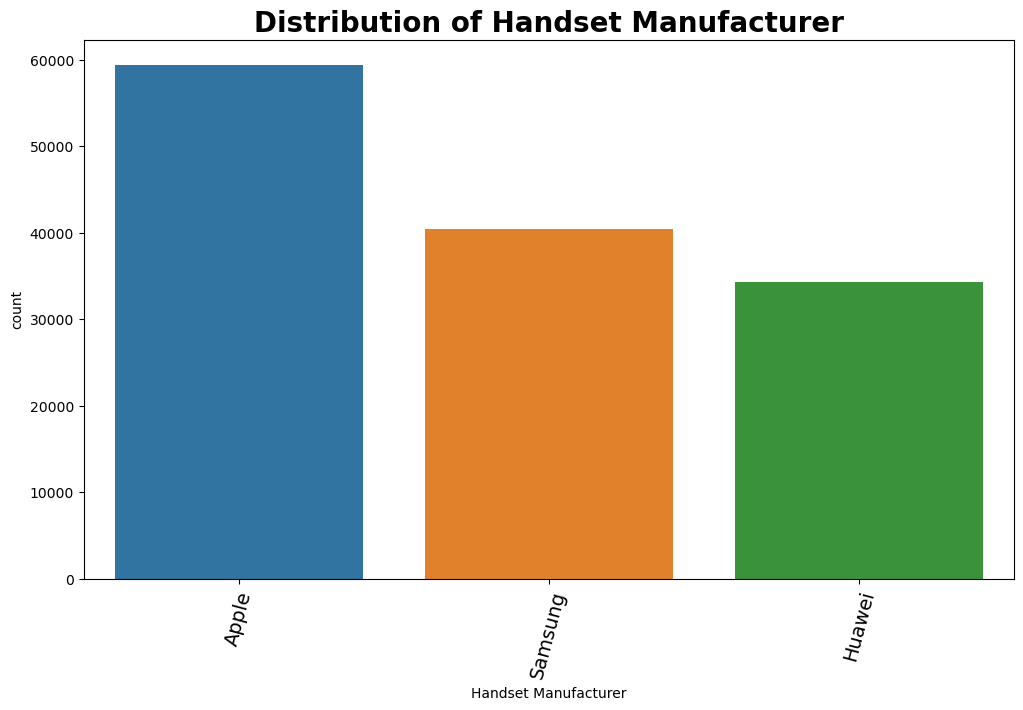

In [69]:
plot_count(clean_data, 'Handset Manufacturer', top=3)




Apple and Huawei drive the world of telecommunications, with Samsung following closely behind. Apple leads in manufacturer diversity and handset variety. Conversely, Huawei's success largely stems from a single popular handset model.

## Total volume data distribution

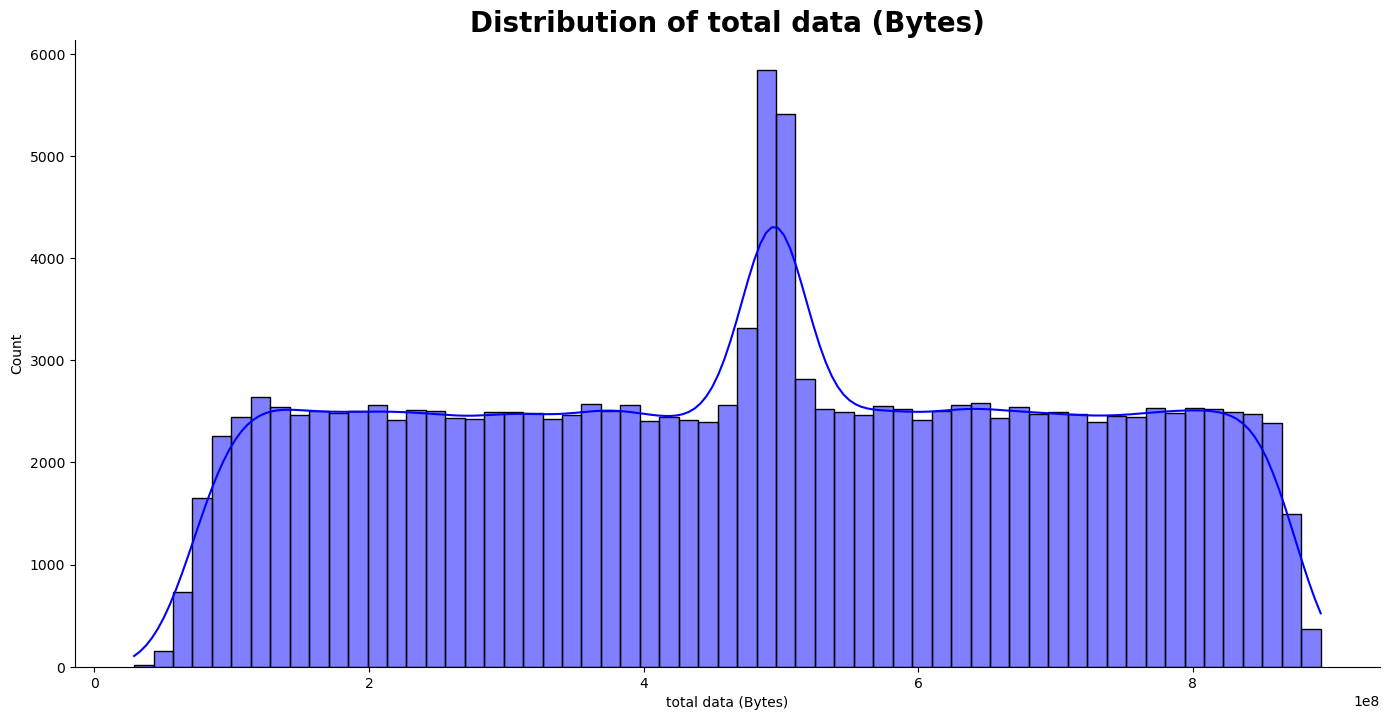

In [28]:
plot_hist(clean_data, "total data (Bytes)", "blue")

# Interpreation

total data distribution is far from the normal one

# Applications data distibution

In [29]:
aggregate_data_user_total_app.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data
0,3.360100e+10,1,116720.0,4.546640e+08,36053108.0,2232135.0,4389005.0,1.331362e+06,21624548.0,27180981.0,4.234318e+08,386570872.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3.307781e+06,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3.205380e+06,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2.284670e+06,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,2.860947e+06,41533002.0,49201724.0,1.314798e+09,804804484.0


In [30]:
# plot_hist(aggregate_data_user_total_app, "Dur. (ms)", "blue")

# Bivariate analysis

### top 5 handsets per top 3 handset manufacturer

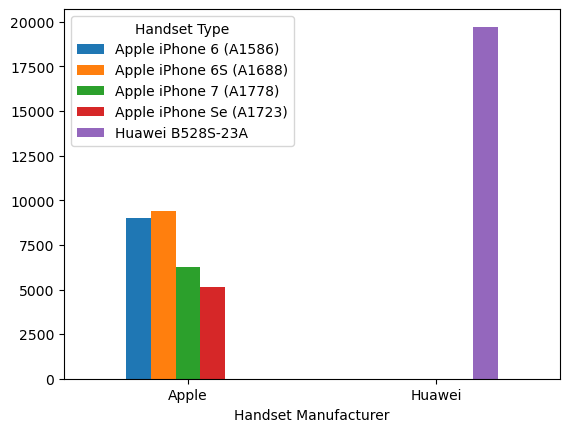

In [31]:


selected_data=clean_data[clean_data["Handset Manufacturer"].isin(["Apple","Samsung","Huawei"])]
# plot_count(selected_data, 'Handset Type', top=5)

plot_bar(clean_data, 'Handset Manufacturer','Handset Type', "top 5 handsets per top 3 handset manufacturer", 'Handset Manufacturer', 'Handset Type count', 3,5)

# Interpretation

Apple Iphone 6, 6S, 7 and Se are mostly used while Huawei perform well with B528S-23A 

## relationship between each application & the total DL+UL data 

let add the total data to aggregate_data_user_total_app

In [75]:

aggregate_data_user_total_app= total_data(aggregate_data_user_total_app)

## correlation between the total and application data

In [76]:
aggregate_data_user_total_app.iloc[:,5:].corr()["total data (Bytes)"]

Social_media_data     0.999313
Google_data           0.999470
Email_data            0.999430
Youtube_data          0.999513
Netflix_data          0.999514
Gaming_data           0.999982
Others_data           0.999323
total data (Bytes)    1.000000
Name: total data (Bytes), dtype: float64

# Interpretation

There is a very strong linear relationship the total data and  the application data

## users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


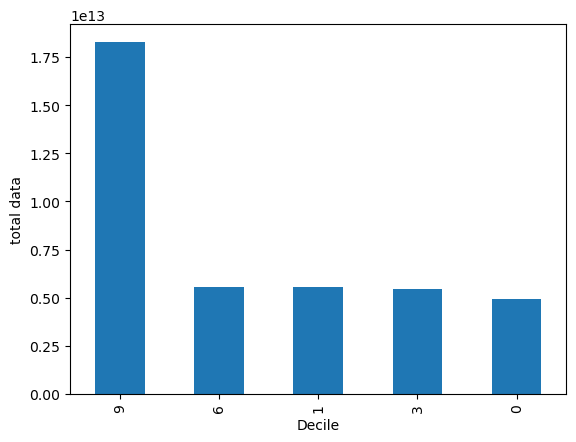

In [77]:
decile_plot(aggregate_data_user_total_app)

## correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


In [78]:
applicationsData= aggregate_data_user_total_app[['Social_media_data', 'Google_data', 'Email_data',
       'Youtube_data', 'Netflix_data', 'Gaming_data', 'Others_data']]

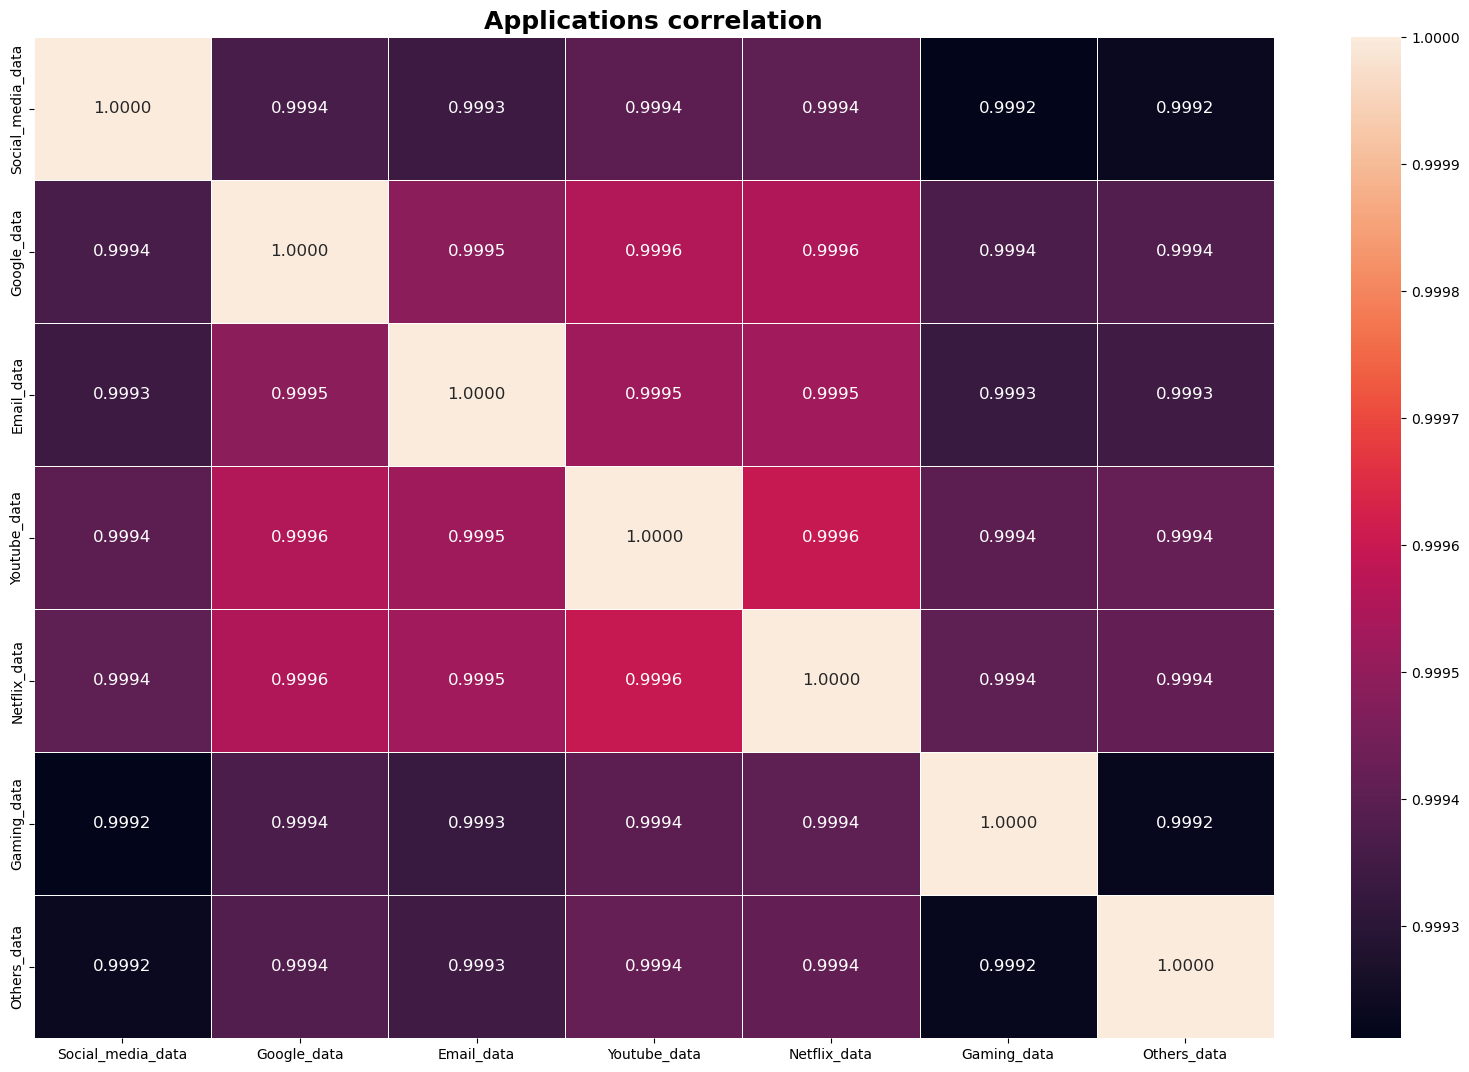

In [79]:

plot_heatmap(applicationsData, "Applications correlation", cbar=True)

The applications total data volumes are highly correlated with a strong linear relationship

## Dimensionality Reduction – principal component analysis to reduce the dimensions of the data and 

In [80]:
aggregate_data_user_total_app.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data,total data (Bytes)
0,3.360100e+10,1,116720.0,4.546640e+08,36053108.0,2232135.0,4389005.0,1.331362e+06,21624548.0,27180981.0,4.234318e+08,386570872.0,4.907171e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3.307781e+06,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3.205380e+06,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2.284670e+06,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,2.860947e+06,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09


In [99]:


# Separating out the features
x = aggregate_data_user_total_app.drop(["total data (Bytes)", "MSISDN/Number", "Total DL (Bytes)","Total UL (Bytes)"], axis=1).values



In [101]:

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [102]:


pca = PCA()

principalComponents = pca.fit_transform(x)



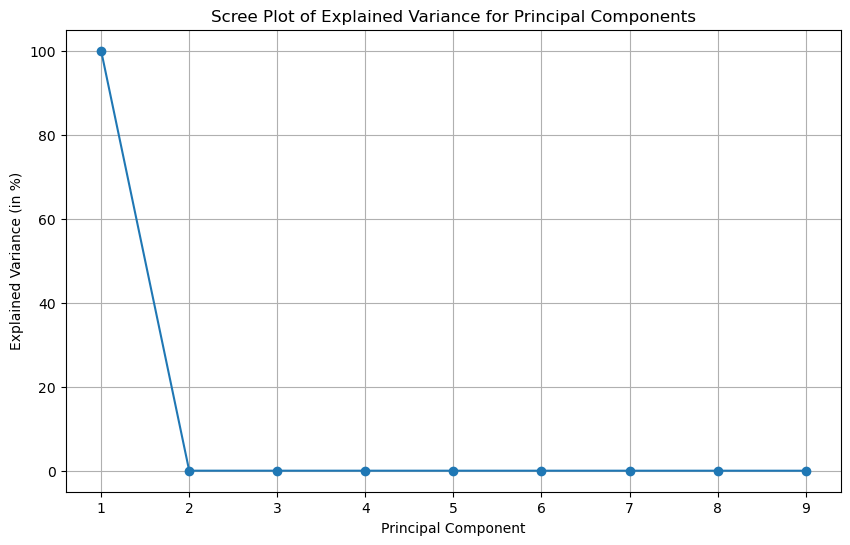

In [103]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display th

 Using the elbow rule, we can slect the first two components for our anlysis. Let perform the pca with two components

In [104]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])

### percentage of explained variance by the first two components

In [105]:
pca.explained_variance_ratio_

array([9.99495502e-01, 1.01160405e-04])

In [106]:
pca.explained_variance_ratio_.sum()

0.9995966622266447

## Interpretation of the results .

- The first principal component represents 99% of the total information and the second 0.01%.62%, almost the total informations by the first two components.

- For more analysis we can replace Dur. (ms),	Social_media_data,	Google_data,	Email_data,	Youtube_data,	Netflix_data,	Gaming_data, and 	Others_data by the two principal components

# add principal component to users data

In [107]:
usersdf=pd.concat([aggregate_data_user_total_app,  principalDf], axis=1)   

In [92]:
usersdf.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data,total data (Bytes),principal component 1,principal component 2
0,3.360100e+10,1,116720.0,4.546640e+08,36053108.0,2232135.0,4389005.0,1.331362e+06,21624548.0,27180981.0,4.234318e+08,386570872.0,4.907171e+08,-0.318009,1.405228
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3.307781e+06,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08,-0.329956,1.403072
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3.205380e+06,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08,-0.292548,1.409729
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2.284670e+06,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08,-0.368799,1.396101
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,2.860947e+06,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09,-0.167797,1.431817


### save the users data

In [108]:

usersdf.to_csv("../data/users_pcomponents_data.csv")